<a href="https://colab.research.google.com/github/JohnMorrisonn/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_123_Make_Explanatory_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make Explanatory Visualizations

### Objectives

- identify misleading visualizations and how to fix them
- use Seaborn to visualize distributions and relationships with continuous and discrete variables
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

# Avoid Misleading Visualizations

Did you find/discuss any interesting misleading visualizations in your Walkie Talkie?

## What makes a visualization misleading?

[5 Ways Writers Use Misleading Graphs To Manipulate You](https://venngage.com/blog/misleading-graphs/)

## Two y-axes##

<img src="https://kieranhealy.org/files/misc/two-y-by-four-sm.jpg" width="800">
 
 Other Examples: 
 - [Spurious Correlations](https://tylervigen.com/spurious-correlations)
 - <https://blog.datawrapper.de/dualaxis/>
 - <https://kieranhealy.org/blog/archives/2016/01/16/two-y-axes/>
 - <http://www.storytellingwithdata.com/blog/2016/2/1/be-gone-dual-y-axis>

##  Y-axis doesn't start at zero.

<img src="https://i.pinimg.com/originals/22/53/a9/2253a944f54bb61f1983bc076ff33cdd.jpg" width="600">

## Pie Charts are bad

<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2009/11/Fox-News-pie-chart.png?fit=620%2C465&ssl=1" width="600">

## Pie charts that omit data are extra bad
 
- A guy makes a misleading chart that goes viral

 What does this chart imply at first glance? You don't want your user to have to do a lot of work in order to be able to interpret you graph correctly. You want that first-glance conclusions to be the correct ones.

 <img src="https://pbs.twimg.com/media/DiaiTLHWsAYAEEX?format=jpg&name=medium" width='600'>
 
 <https://twitter.com/michaelbatnick/status/1019680856837849090?lang=en>
 
- It gets picked up by overworked journalists (assuming incompetency before malice)
 
 <https://www.marketwatch.com/story/this-1-chart-puts-mega-techs-trillions-of-market-value-into-eye-popping-perspective-2018-07-18>
 
- Even after the chart's implications have been refuted, it's hard a bad (although compelling) visualization from being passed around.

 <https://www.linkedin.com/pulse/good-bad-pie-charts-karthik-shashidhar/>

**["yea I understand a pie chart was probably not the best choice to present this data."](https://twitter.com/michaelbatnick/status/1037036440494985216)**

## Pie Charts that compare unrelated things are next-level extra bad

<img src="http://www.painting-with-numbers.com/download/document/186/170403+Legalizing+Marijuana+Graph.jpg" width="600">


## Be careful about how you use volume to represent quantities:

radius vs diameter vs volume

<img src="https://static1.squarespace.com/static/5bfc8dbab40b9d7dd9054f41/t/5c32d86e0ebbe80a25873249/1546836082961/5474039-25383714-thumbnail.jpg?format=1500w" width="600">

## Don't cherrypick timelines or specific subsets of your data:

<img src="https://wattsupwiththat.com/wp-content/uploads/2019/02/Figure-1-1.png" width="600">

Look how specifically the writer has selected what years to show in the legend on the right side.

<https://wattsupwiththat.com/2019/02/24/strong-arctic-sea-ice-growth-this-year/>

Try the tool that was used to make the graphic for yourself

<http://nsidc.org/arcticseaicenews/charctic-interactive-sea-ice-graph/>
                                                                                           

## Use Relative units rather than Absolute Units

<img src="https://imgs.xkcd.com/comics/heatmap_2x.png" width="600">

## Avoid 3D graphs unless having the extra dimension is effective

Usually you can Split 3D graphs into multiple 2D graphs

3D graphs that are interactive can be very cool. (See Plotly and Bokeh)

<img src="https://thumbor.forbes.com/thumbor/1280x868/https%3A%2F%2Fblogs-images.forbes.com%2Fthumbnails%2Fblog_1855%2Fpt_1855_811_o.jpg%3Ft%3D1339592470" width="600">

## Don't go against typical conventions

<img src="http://www.callingbullshit.org/twittercards/tools_misleading_axes.png" width="600">

# Tips for choosing an appropriate visualization:

## Use Appropriate "Visual Vocabulary"

[Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)

## What are the properties of your data?
- Is your primary variable of interest continuous or discrete?
- Is in wide or long (tidy) format?
- Does your visualization involve multiple variables?
- How many dimensions do you need to include on your plot?

Can you express the main idea of your visualization in a single sentence?

How hard does your visualization make the user work in order to draw the intended conclusion?

## Which Visualization tool is most appropriate? 

[Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)

## Anatomy of a Matplotlib Plot

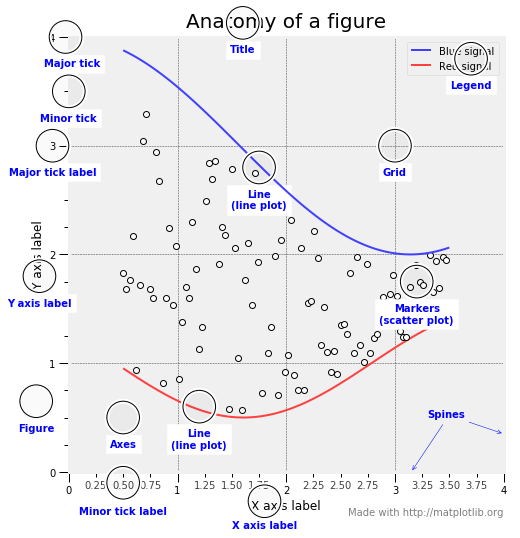

In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1,Y2,len(X))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, aspect=1)

def minor_tick(x,pos):
  if not x % 1.0:
    return ""
  return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0,4)
ax.set_ylim(0,4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')


# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

# Making Explanatory Visualizations with Seaborn

Today we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)



In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

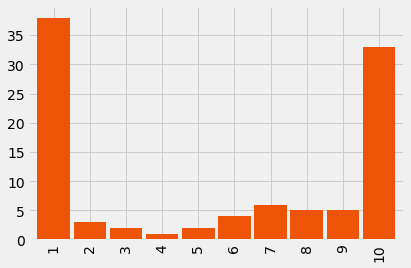

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='#ED5407', width=0.9);

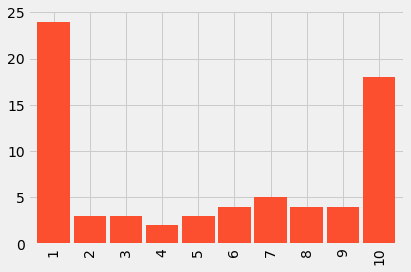

In [0]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

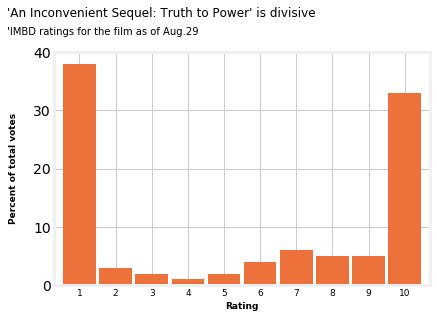

In [0]:
plt.style.use('fivethirtyeight')

fig = plt.figure()

#Set background color
fig.patch.set_facecolor('white')

#Set bar color and width
ax = fake.plot.bar(color='#ED713A', width=0.9)

#Set inner Axes color
ax.set(facecolor='white')

#ax.set_title('Is this the title?')

#Set title and subtitle
ax.text(x=-2, y=46, s="'An Inconvenient Sequel: Truth to Power' is divisive", fontsize=12, fontweight='100')
ax.text(x=-2, y=43, s="'IMBD ratings for the film as of Aug.29", fontsize=10, fontweight='50')

#Set x and y-axis ticks
ax.set_xticklabels(range(1,11), rotation=0, fontsize=9)
ax.set_yticks(range(0,50,10))

#Set axis labels
plt.ylabel(ylabel='Percent of total votes', fontsize=9, fontweight='bold', labelpad=15)
plt.xlabel(xlabel='Rating', fontsize=9, fontweight='bold')

plt.show()



## Reproduce with real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [0]:
pd.set_option('display.max_columns', 50)
print(df.shape)
df.head(20)

(80053, 27)


,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2
5,2017-07-17 12:28:33.970009,108,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.2,6.2,9,37,0,3,1,1,3,6,2,6,49,34.3,0.0,2.8,0.9,0.9,2.8,5.6,1.9,5.6,45.4
6,2017-07-17 12:28:34.199847,17,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.7,8.4,10,2,0,0,0,1,0,0,2,0,12,11.8,0.0,0.0,0.0,5.9,0.0,0.0,11.8,0.0,70.6
7,2017-07-17 12:28:34.381001,196,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,4.3,5.0,2,92,7,3,1,6,4,4,4,12,63,46.9,3.6,1.5,0.5,3.1,2.0,2.0,2.0,6.1,32.1
8,2017-07-17 12:28:34.590224,164,Males Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-ma...,4.1,4.5,1,85,6,3,1,5,3,4,3,12,42,51.8,3.7,1.8,0.6,3.0,1.8,2.4,1.8,7.3,25.6
9,2017-07-17 12:28:34.807101,25,Females Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-fe...,7.2,8.2,10,5,0,0,0,0,0,0,0,0,20,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0


In [55]:
df.sample(1).T

,29977
timestamp,2017-08-11 15:50:04.489361
respondents,591
category,Aged 30-44
link,http://www.imdb.com/title/tt6322922/ratings-age_3
average,5.3
mean,5.5
median,6
1_votes,243
2_votes,20
3_votes,8


In [56]:

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'].describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
df.set_index('timestamp', inplace=True)
df['2017-08-29']

In [58]:
lastday = df['2017-08-29']
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.tail(30)

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 18:20:06.215486,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 18:30:06.738669,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 18:40:05.771150,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 18:50:06.051326,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 19:00:06.002542,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 19:10:06.066863,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 19:20:06.286871,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 19:30:06.395003,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 19:40:06.372808,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8


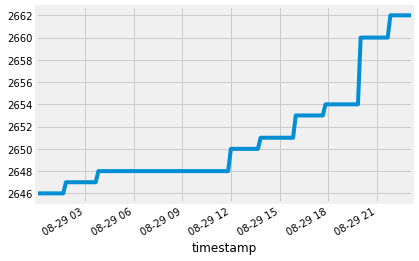

In [59]:
lastday_filtered.respondents.plot()


In [60]:
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [61]:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [64]:
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data

timestamp,2017-08-29 23:10:06.218251
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


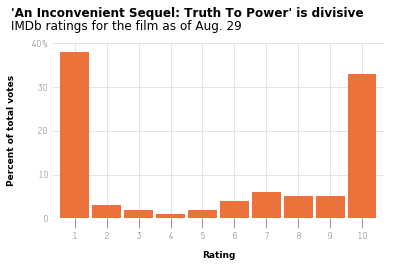

In [183]:
import matplotlib.font_manager
plt.style.use('fivethirtyeight')

fig = plt.figure()

ax = fake.plot.bar(color='#ED713A', width=0.9, legend=False, figsize=(5.3,3))

fig.patch.set_facecolor('#FFFFFF')

ax.set(facecolor='#FFFFFF')

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

ax.text(x=-2, y=46, s="'An Inconvenient Sequel: Truth To Power' is divisive", fontweight="semibold", fontsize='12', fontname='Sans')
ax.text(x=-2, y=43, s="IMDb ratings for the film as of Aug. 29", fontweight="normal", fontsize=12);

ax.set_xticklabels(range(1,11), rotation=0, fontsize=10, fontname='Decima Mono', alpha=0.5)
ax.set_yticks(range(0,50,10))
ax.set_yticklabels(['0', '10', '20', '30', '40%'], fontsize=10, fontname='Decima Mono',alpha=0.5)
plt.tick_params(axis='x', length=10, grid_linewidth=0.5, color='gray')
plt.tick_params(axis='y', grid_linewidth=0.5)

plt.ylabel(ylabel='Percent of total votes', fontsize=9, fontweight='semibold', labelpad=15, fontname='Sans')
plt.xlabel(xlabel='Rating', fontsize=9, fontweight='semibold', labelpad=10)

plt.box(on=None)

plt.show()



In [90]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)


# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### 1) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

#### 2) Reproduce one of the following using a library other than Seaborn or Matplotlib.

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### 3) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!









In [0]:
df = pd.read_csv('https://projects.fivethirtyeight.com/trump-approval-data/approval_polllist.csv')

--2019-07-17 23:44:18--  http://samhda.s3-us-gov-west-1.amazonaws.com/s3fs-public/field-uploads-protected/studies/NSDUH-2012/NSDUH-2012-datasets/NSDUH-2012-DS0001/NSDUH-2012-DS0001-bundles-with-study-info/NSDUH-2012-DS0001-bndl-data-tsv.zip
Resolving samhda.s3-us-gov-west-1.amazonaws.com (samhda.s3-us-gov-west-1.amazonaws.com)... 52.95.144.8
Connecting to samhda.s3-us-gov-west-1.amazonaws.com (samhda.s3-us-gov-west-1.amazonaws.com)|52.95.144.8|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24344410 (23M) [application/x-zip-compressed]
Saving to: ‘NSDUH-2012-DS0001-bndl-data-tsv.zip.1’

NSDUH-2012-DS0001-b 100%[===================>]  23.22M   108MB/s    in 0.2s    

2019-07-17 23:44:18 (108 MB/s) - ‘NSDUH-2012-DS0001-bndl-data-tsv.zip.1’ saved [24344410/24344410]

Archive:  NSDUH-2012-DS0001-bndl-data-tsv.zip
replace NSDUH_2012_Tab.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: /bin/bash: LS: command not found


/bin/bash: ls-lh: command not found


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2975) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,QUESTID2,FILEDATE,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,CG30EST,CIG30AV,CIG30BR2,CIG30TPE,CIG30MEN,CIG30MLN,CIG30RO2,CIGDLYMO,CIGAGE,CIGDLYFU,CIGDLMFU,CIG100LF,SNFEVER,SNUFTRY,SNUFYFU,SNUFMFU,SNFREC,SNF30USE,SN30EST,SNF30BR2,CHEWEVER,CHEWTRY,CHEWYFU,CHEWMFU,CHEWREC,CHW30USE,CH30EST,CHW30BR2,SLTTRY,SLTYFU,SLTMFU,SLTREC,SLT30BR2,SLT30FAV,CIGAREVR,CIGARTRY,CIGARYFU,CIGARMFU,CIGARREC,CGR30USE,CI30EST,CGR30BR2,PIPEVER,PIPE30DY,ALCEVER,ALCTRY,ALCYFU,ALCMFU,ALCREC,ALCYRTOT,ALTOTFG,ALFQFLG,ALBSTWAY,ALDAYPYR,ALDAYPMO,ALDAYPWK,ALCDAYS,AL30EST,ALDYSFG,NODR30A,DR5DAY,MJEVER,MJAGE,MJYFU,MJMFU,MJREC,MJYRTOT,MRTOTFG,MJFQFLG,MRBSTWAY,MRDAYPYR,MRDAYPMO,MRDAYPWK,MJDAY30A,MR30EST,COCEVER,COCAGE,COCYFU,COCMFU,COCREC,COCYRTOT,CCTOTFG,CCFQFLG,CCBSTWAY,CCDAYPYR,CCDAYPMO,CCDAYPWK,COCUS30A,CC30EST,CRKEVER,CRKAGE,CRKYFU,CRKMFU,CRAKREC,CRKYRTOT,CRTOTFG,CRFQFLG,CRBSTWAY,CRDAYPYR,CRDAYPMO,CRDAYPWK,CRKUS30A,CR30EST,HEREVER,HERAGE,HERYFU,HERMFU,HERREC,HERYRTOT,HRTOTFG,HRFQFLG,HRBSTWAY,HRDAYPYR,HRDAYPMO,HRDAYPWK,HER30USE,HR30EST,LSD,PCP,PEYOTE,MESC,PSILCY,ECSTASY,HALNOLST,HALNEWA,HALNEWB,HALNEWC,HALNEWD,HALNEWE,HALLAGE,HALYFU,HALMFU,HALLREC,HALYRTOT,HLTOTFG,HLFQFLG,HLBSTWAY,HLDAYPYR,HLDAYPMO,HLDAYPWK,HAL30USE,HL30EST,LSDAGE,LSDYFU,LSDMFU,LSDREC,PCPAGE,PCPYFU,PCPMFU,PCPREC,ECSAGE,ECSYFU,ECSMFU,ECSREC,AMYLNIT,CLEFLU,GAS,GLUE,ETHER,SOLVENT,LGAS,NITOXID,SPPAINT,AEROS,INHNOLST,INHNEWA,INHNEWB,INHNEWC,INHNEWD,INHNEWE,INHEVER,INHAGE,INHYFU,INHMFU,INHREC,INHYRTOT,INTOTFG,INFQFLG,INBSTWAY,INDAYPYR,INDAYPMO,INDAYPWK,INHDY30A,IN30EST,DARVTYLC,PERCTYLX,VICOLOR,ANLCARD,CODEINE,DEMEROL,DILAUD,FIORICET,FIORINAL,HYDROCOD,METHDON,MORPHINE,OXYCONTN,PHENCOD,PROPOXY,SK65A,STADOL,TALACEN,TALWIN,TALWINNX,TRAMADOL,ULTRAM,ANLNOLST,ANALNEWA,ANALNEWB,ANALNEWC,ANALNEWD,ANALNEWE,ANLEVER,ANALAGE,ANALYFU,ANALMFU,ANALREC,ANLYRTOT,PRTOTFG,PRFQFLG,PRBSTWAY,PRDAYPYR,PRDAYPMO,PRDAYPWK,OXYCAGE,OXYCYFU,OXYCMFU,OXYCREC,OXYYRTOT,OXTOTFG,OXFQFLG,OXBSTWAY,OXDAYPYR,OXDAYPMO,OXDAYPWK,KLONOPIN,XNAXATVN,VALMDIAZ,TRNCARD,ATARAX,...,YNURSMDE,YRELMDE,YHBCHMDE,YOTHMDE,YHLTMDE,YALTMDE,YMDEHPRX,YMDEHPO,YMDERXO2,YMDEHARX,YMDEIMDA,YSDSHOME,YSDSWRK,YSDSREL,YSDSSOC,YSDSOVRL,MDEIMPY,CADRLAST,CADRPEOP,CADRCAR,CADRHOME,CADROTHM,CADRPUBL,CADRBAR,CADREVNT,CADRSCHL,CADROTH,CADROTS2,CABUYFRE,CAGVMONY,CABUYWHO,CABPLACE,CABUNDAG,CAGVWHO,CAFREWHO,CAFRESP2,CADRKDRG,CADRKMRJ,CADRKCOC,CADRKHER,CADRKHAL,CADRKINH,CADRKANL,CADRKTRN,CADRKSTM,CADRKMTH,CADRKSED,ED4FLAG,CABNGEV,CABNGAGE,EIBNGAGE,CABNGYFU,EIBNGYFU,CABNGMFU,EIBNGMFU,CA4FDEV,CA4FDDYS,EI4FDDYS,CA4FDAGE,EI4FDAGE,CA4FDYFU,EI4FDYFU,CA4FDMFU,EI4FDMFU,UADPEOP,UADCAR,UADHOME,UADOTHM,UADPUBL,UADBAR,UADEVNT,UADSCHL,UADROTH,UADOTSP,UADPAID,UADMONY,UADBWHO,UADPLACE,UADBUND,UADCAG,UADFWHO,UADFRD,DRKMRJ,DRKCOC,DRKHER,DRKHAL,DRKINH,DRKANL,DRKTRN,DRKSTM,DRKMTH,DRKSED,DRKSUM,DRKIEM,EDFAM18,IMOTHER,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,IRFAMSZ2,IIFAMSZ2,IRKIDFA2,IIKIDFA2,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,GRPHLTIN,HLTINALC,HLTINDRG,HLTINMNT,HLTINNOS,HLCNOTYR,HLCNOTMO,HLCLAST,HLLOSRSN,HLNVCOST,HLNVOFFR,HLNVREF,HLNVNEED,HLNVSOR,IRPINSUR,IIPINSUR,IRINSUR,IIINSUR,IRINSUR3,IIINSUR3,IRMCDCHP,IIMCDCHP,IRMEDICR,IIMEDICR,IRCHMPUS,IICHMPUS,IRPRVHLT,IIPRVHLT,IROTHHLT,IIOTHHLT,HLCALLFG,HLCALL99,ANYHLTI2,IRINSUR4,IIINSUR4,OTHINS,IRFAMSOC,IIFAMSOC,IRFAMWAG,IIFAMWAG,IRFAMSSI,IIFAMSSI,IRFSTAMP,IIFSTAMP,IRFAMPMT,IIFAMPMT,IRFAMSVC,IIFAMSVC,IRWELMOS,IIWELMOS,IRPINC3,IIPINC3,IRFAMIN3,IIFAMIN3,GOVTPROG,INCOME,POVERTY2,LANGVER,QUARTER,GQTYPE2,AGE2,NOMARR2,SERVICE,MILSTAT,HEALTH,IRSEX,IRMARIT,IIMARIT,IREDUC2,IIEDUC2,CATAGE,CATAG2,CATAG3,CATAG6,CATAG7,PREGAGE2,SEXAGE,NEWRACE2,SEXRACE,EDUCCAT2,HEALTH2,MOVESPY2,EIMOVPYR,MOVYRFLG,SCHENRL,EDUCATN2,SDNTFTPT,SCHDSICK,SCHDSKIP,HSDIPLMA,HSGED,LFSCHWH2,LFTSCHA2,TELNO2,COLLENR,COLLENR2,JBSTATR2,WRKHAVJB,WRKHRSW2,WRKIDST2,WRKOCUP2,WRKBZCA2,WRKEDYR,WRKSLFEM,WRKJOBS2,WRKUNEMP,WRKUNWKS,WRKLSTY2,WRKIDSY2,WRKOCUY2,WRKBZCY2,WORKDAYS,WORKBLAH,LOCSIZE,DRGPLCY,PLCYCOV,WKDRGED,DRGPRGM,USALCTST,USDRGTST,TSTHIRE,TSTRAND,FI